<a href="https://colab.research.google.com/github/kukuhwd/Final-Task_ID-X-Partners_Data-Scientist_Kukuh-Waluja-Djati/blob/main/Final-Task_ID-X-Partners_Data-Scientist_Kukuh-Waluja-Djati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [84]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
from sklearn.linear_model import LogisticRegression # Mengimpor algoritma regresi logistik untuk klasifikasi
import seaborn as sns  # Mengimpor pustaka seaborn
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Mengimpor scaler untuk normalisasi data
from sklearn.decomposition import PCA  # Mengimpor PCA untuk reduksi dimensi (jika diperlukan)
from sklearn.preprocessing import LabelEncoder # Mengimpor Label encoder
from sklearn.model_selection import train_test_split, GridSearchCV # Memgimpor library untuk splitting data dan metode grid search
from sklearn.linear_model import LogisticRegression # mengimpor library algortima regresi logistik
from sklearn.neighbors import KNeighborsClassifier # mengimpor library algortima KNN
from sklearn.tree import DecisionTreeClassifier # mengimpor library algortima Decison tree
from sklearn.ensemble import RandomForestClassifier # mengimpor library algortima random forest
from sklearn.model_selection import cross_val_score # mengimpor library cross validation
import numpy as np # mengimpor library numpy untuk operasi numerik
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # mengimpor library metrik evaluasi
from tabulate import tabulate # mengimpor library tabel

print("Import Library Berhasil")

Import Library Berhasil


# **Import Data**

In [85]:
from google.colab import drive # mengimpor pustaka untuk menghubungkan ke grive
drive.mount('/content/drive')

# Baca file CSV dari gdrive
data = pd.read_csv('/content/drive/MyDrive/Rakamin/loan_data_2007_2014.csv')

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-4186774880.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Rakamin/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Understanding**

In [80]:
# @title Karakteristik Baris dan Kolom

# melihat type data pada variabel
print("Menampilkan Type Data pada Variabel")
print("\n")
data.info()

# menghitung jumlah variabel berdasarkan type data
data_int = data.select_dtypes(include=['int64'])
data_float = data.select_dtypes(include=['float64'])
data_object = data.select_dtypes(include=['object'])

print("\nJumlah variabel berdasarkan type data sebagai berikut")
print(f"Jumlah variabel bertipe integer: {len(data_int.columns)}")
print(f"Jumlah variabel bertipe float: {len(data_float.columns)}")
print(f"Jumlah variabel bertipe object: {len(data_object.columns)}")

# meiihat jumlah baris dan kolom
print("\nJumlah baris dan kolom pada data sebagai berikut")
jumlah_baris, jumlah_kolom = data.shape
print(f"Jumlah baris: {jumlah_baris}")
print(f"Jumlah kolom: {jumlah_kolom}")

Menampilkan Type Data pada Variabel


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length          

In [81]:
# @title Karakteristik data kontinu

# memisahkan antara data kontinu dan data kategorik
data_kontinu = data.select_dtypes(include=['int64', 'float64'])
data_kategorik = data.select_dtypes(include=['object'])

# melihat statistika deskriptif pada data kontinu
print("Menampilkan Statitika Deskriptif pada Data Kontinu")
print("\n")
data_kontinu.describe()

Menampilkan Statitika Deskriptif pada Data Kontinu




,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [86]:
# @title Karakteristik data kategori
variabel_modus = data_kategorik.drop(columns=['url','desc']) # menghapus variabel url dan desc karena memperlambat kinerja


# menghitung modus dari data kategori
print("Modus untuk setiap variabel kategorik")
print("\n")
for col_name in variabel_modus:
    if col_name in data_kategorik.columns:
        modus_values = data_kategorik[col_name].mode()

        # Menghitung frekuensi modus
        # value_counts() akan memberikan frekuensi semua nilai unik
        all_counts = data_kategorik[col_name].value_counts()

        # Ambil frekuensi dari modus
        if not modus_values.empty:
            modus_freq = all_counts[modus_values.iloc[0]]

            # Format output modus: gabungkan jika ada lebih dari satu
            if len(modus_values) > 1:
                modus_str = ', '.join(modus_values.astype(str).tolist())
            else:
                modus_str = str(modus_values.iloc[0])

            print(f"Modus dari variabel {col_name} adalah {modus_str} sebanyak {modus_freq}")
        else:
            print(f"Variabel {col_name} tidak memiliki modus (mungkin kosong atau semua unik).")
    else:
        print(f"Kolom '{col_name}' tidak ditemukan.")

Modus untuk setiap variabel kategorik


Modus dari variabel term adalah  36 months sebanyak 337953
Modus dari variabel grade adalah B sebanyak 136929
Modus dari variabel sub_grade adalah B3 sebanyak 31686
Modus dari variabel emp_title adalah Teacher sebanyak 5399
Modus dari variabel emp_length adalah 10+ years sebanyak 150049
Modus dari variabel home_ownership adalah MORTGAGE sebanyak 235875
Modus dari variabel verification_status adalah Verified sebanyak 168055
Modus dari variabel issue_d adalah Oct-14 sebanyak 38782
Modus dari variabel loan_status adalah Current sebanyak 224226
Modus dari variabel pymnt_plan adalah n sebanyak 466276
Modus dari variabel purpose adalah debt_consolidation sebanyak 274195
Modus dari variabel title adalah Debt consolidation sebanyak 164075
Modus dari variabel zip_code adalah 945xx sebanyak 5304
Modus dari variabel addr_state adalah CA sebanyak 71450
Modus dari variabel earliest_cr_line adalah Oct-00 sebanyak 3674
Modus dari variabel initial_list_status ad

# **Exploratory Data Analysis (EDA)**

In [ ]:
# @title Distribusi variabel numerik menggunakan histogram

plt.figure(figsize=(12, 30))
for i, column in enumerate(data_kontinu.columns, 1):
    plt.subplot(12, 5, i)
    sns.histplot(data_kontinu[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

/tmp/ipython-input-4284024384.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=variabel_modus[column], palette='viridis', order=variabel_modus[column].value_counts().index[:4])
/tmp/ipython-input-4284024384.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=variabel_modus[column], palette='viridis', order=variabel_modus[column].value_counts().index[:4])
/tmp/ipython-input-4284024384.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=variabel_modus[column], palette='viridis', order=variabel_modus[column].value_counts().index[

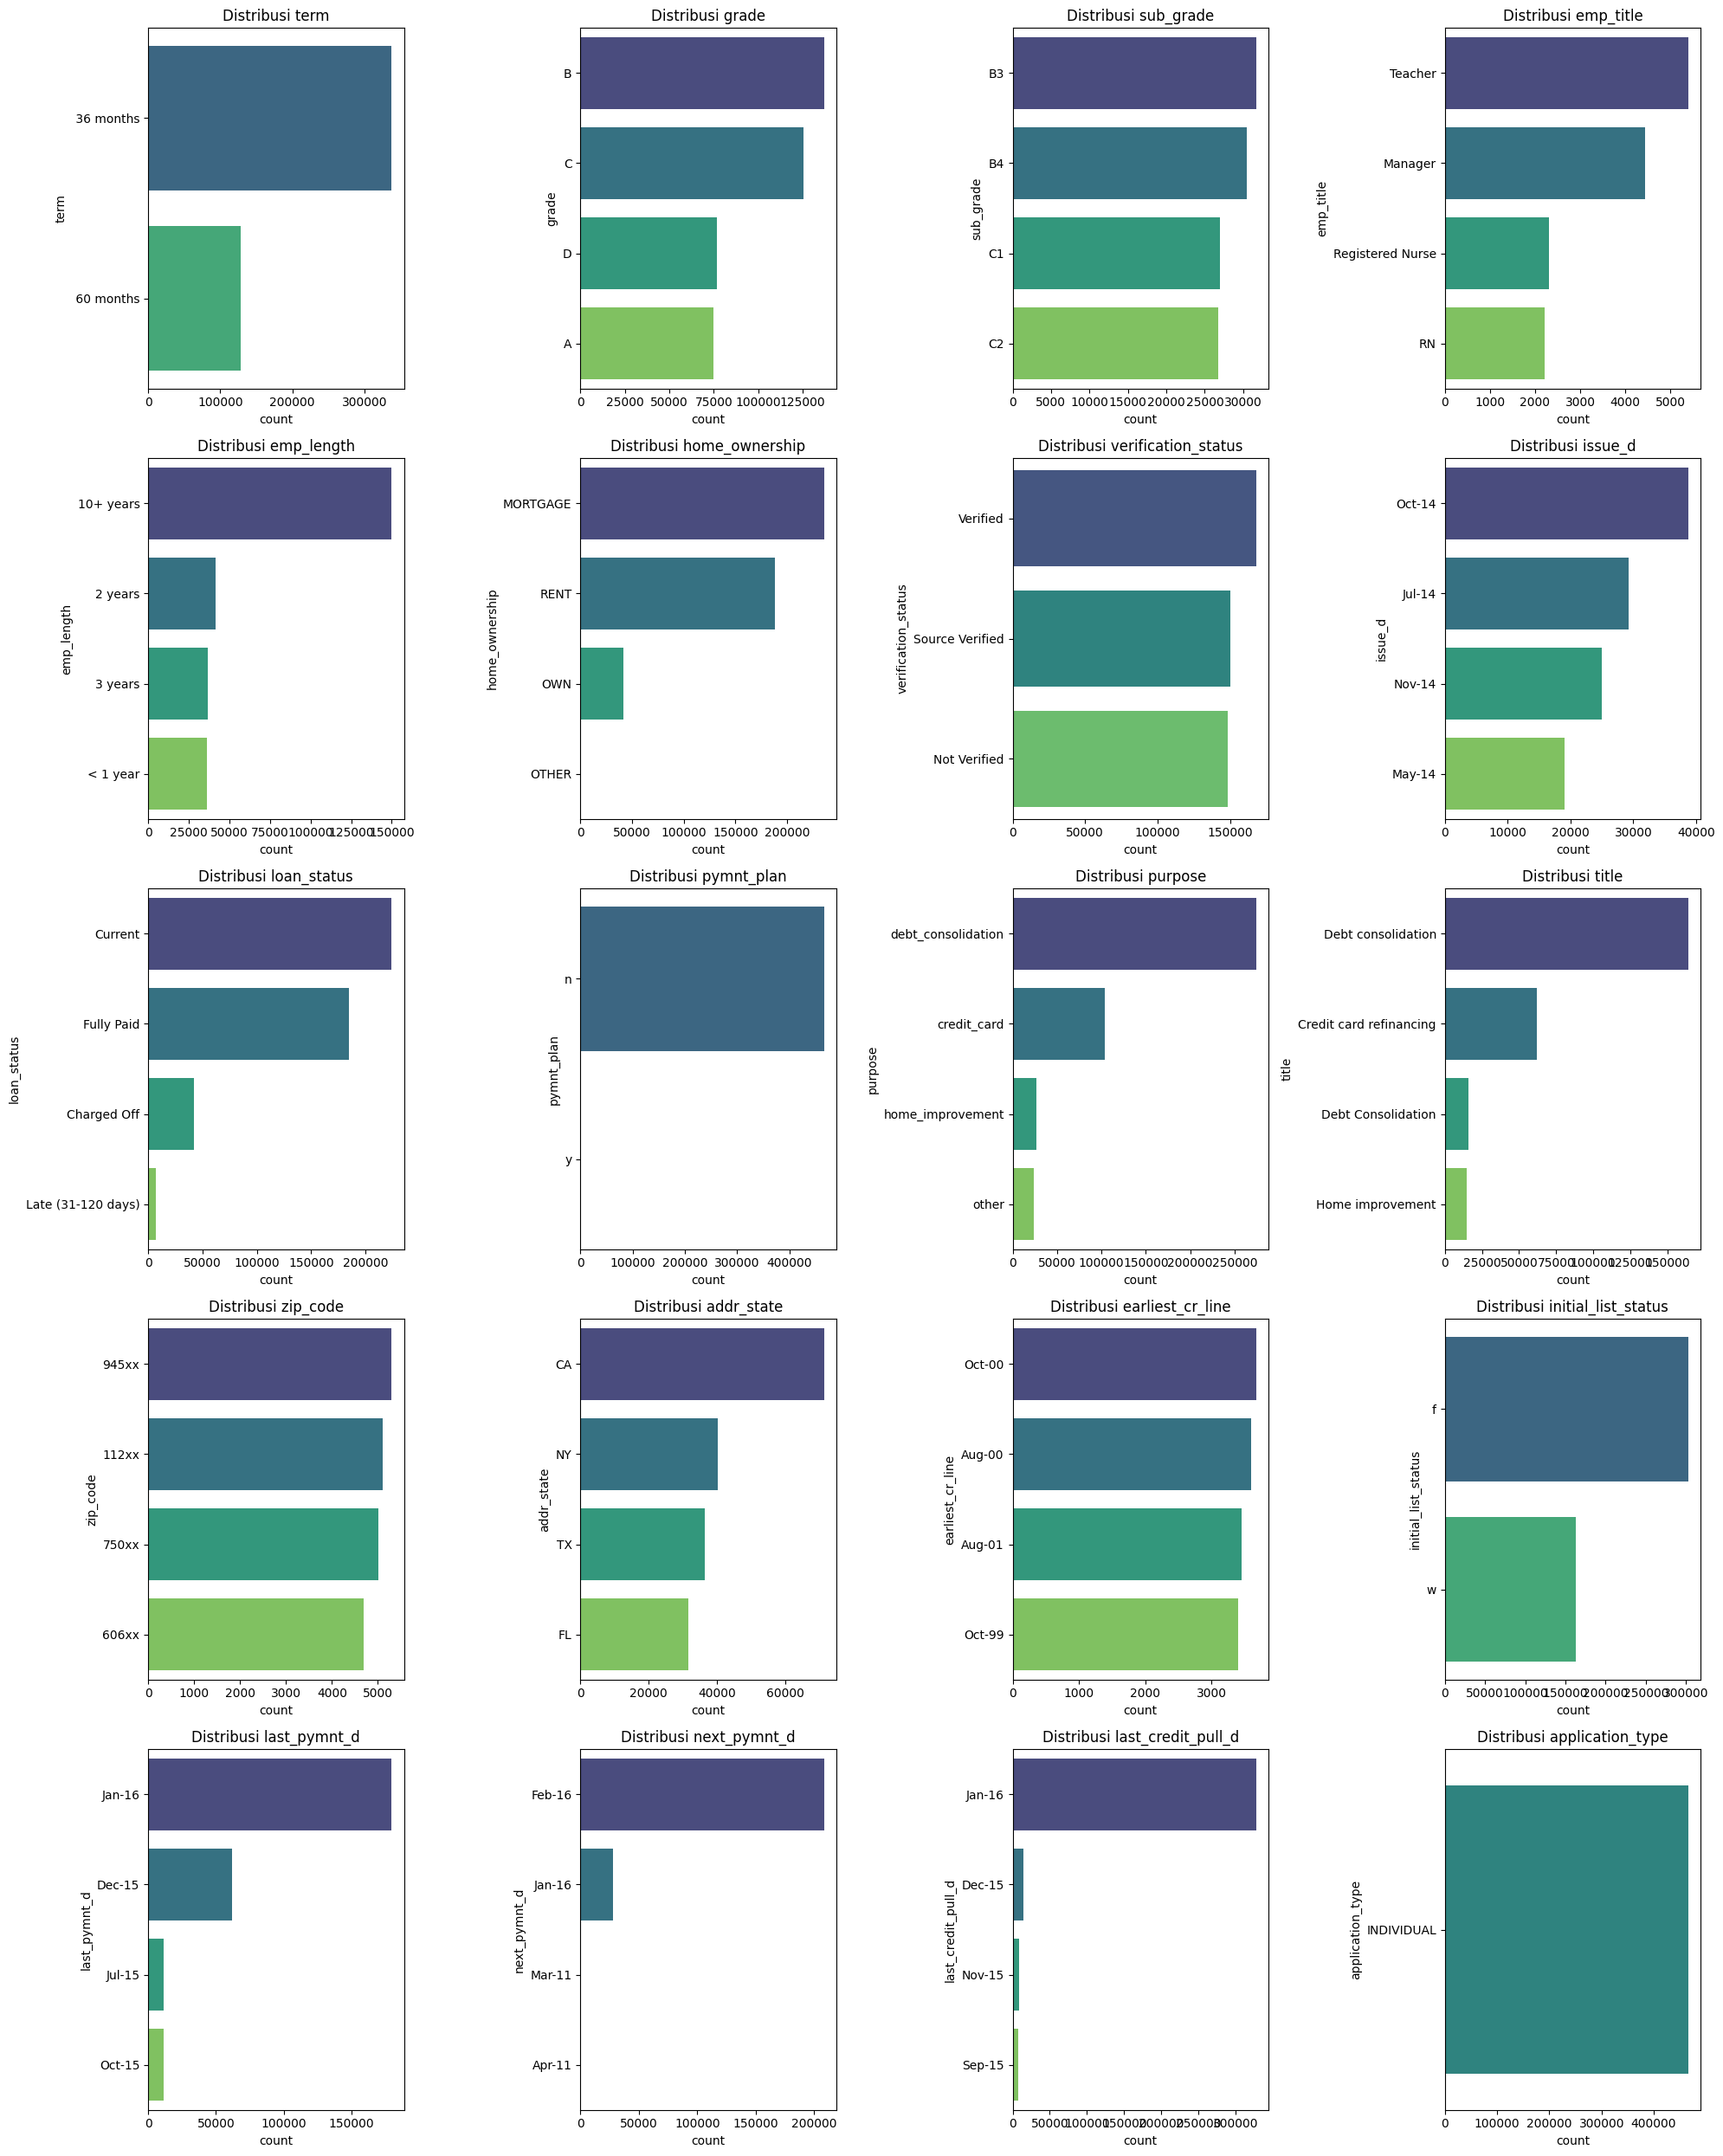

In [87]:
# @title Distribusi variabel kategori menggunakan barchart

plt.figure(figsize=(20, 25))
for i, column in enumerate(variabel_modus, 1):
    plt.subplot(5, 4, i)
    sns.countplot(y=variabel_modus[column], palette='viridis', order=variabel_modus[column].value_counts().index[:4])
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

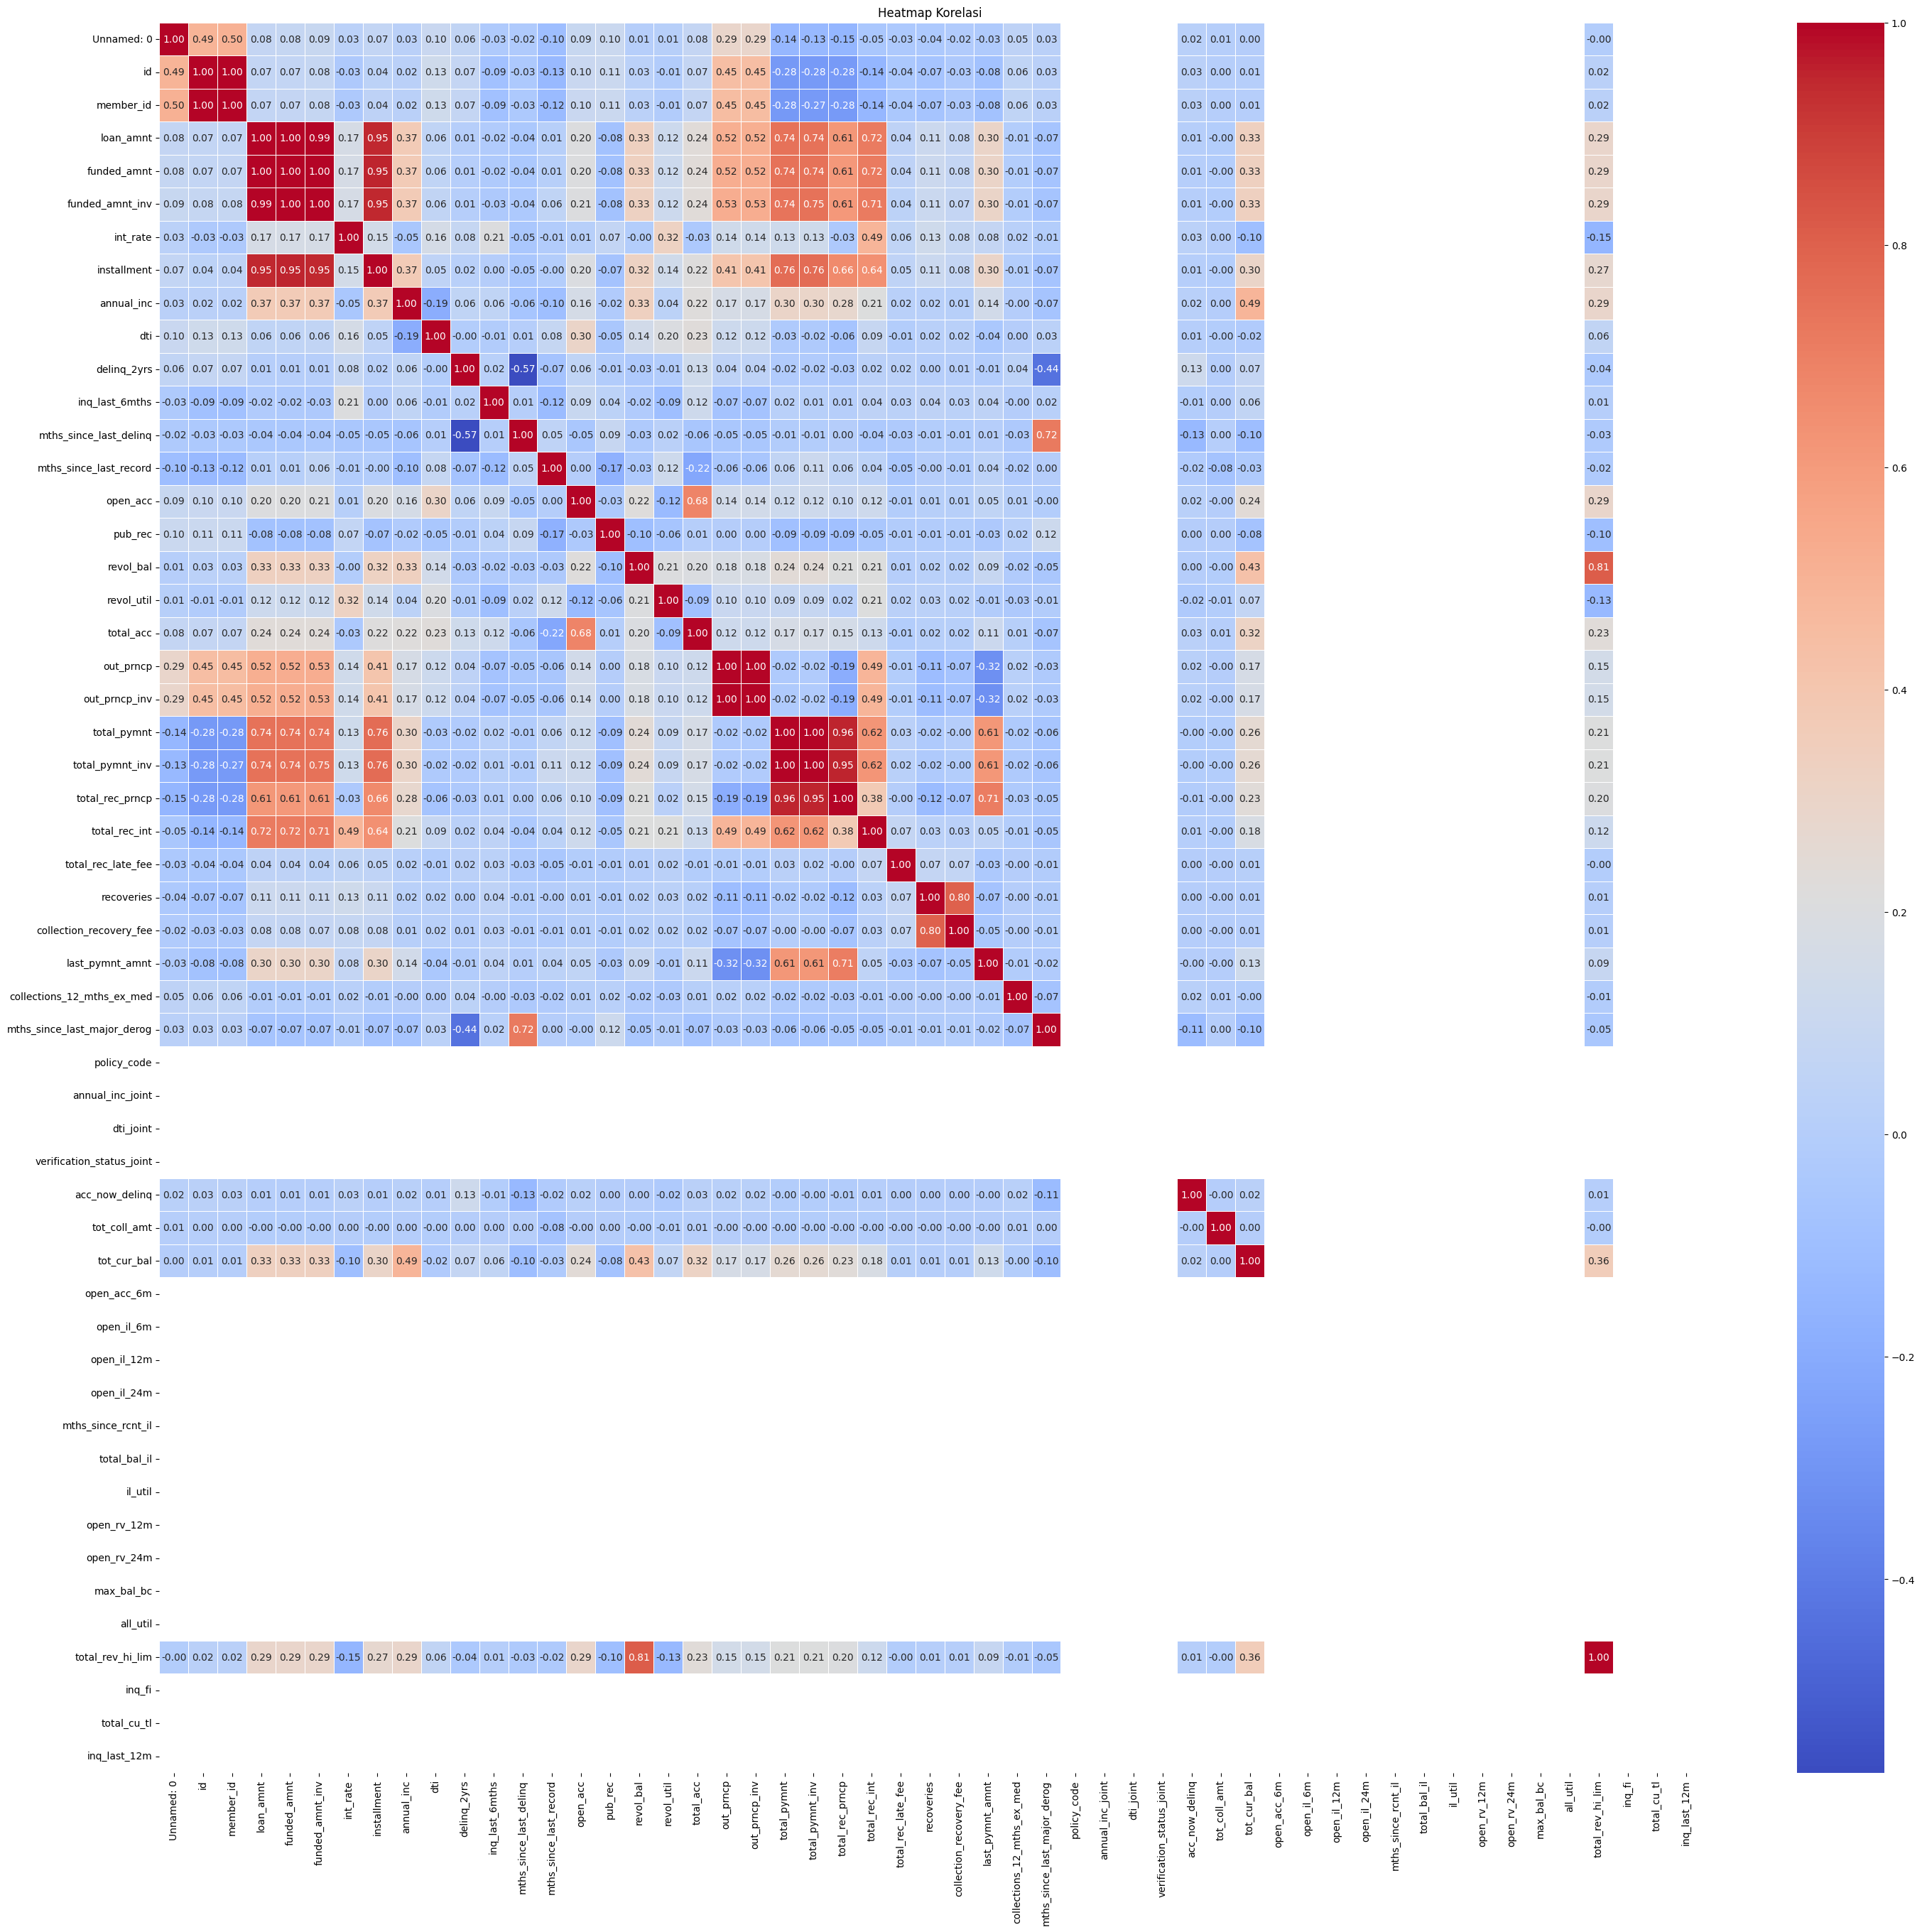

In [88]:
# @title Heatmap korelasi untuk fitur numerik

plt.figure(figsize=(35, 32))
correlation_matrix = data_kontinu.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

/tmp/ipython-input-1204139446.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='grade', data=data, palette='viridis')


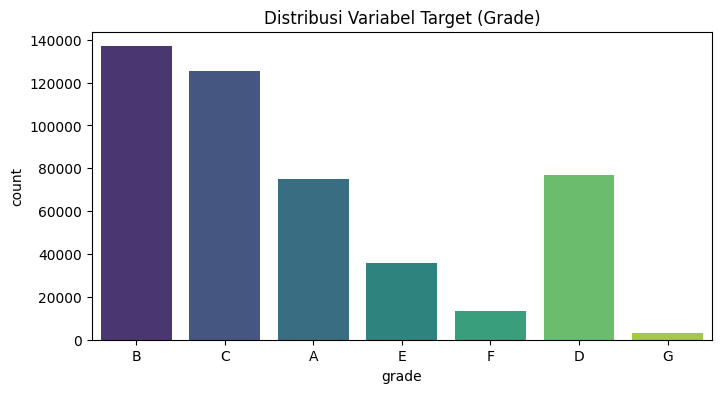


jumlah data dari setiap grade
grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: count, dtype: int64


In [91]:
# @title visualisasi variabel target (grade) menggunakan barchart

data_target = data['grade']

plt.figure(figsize=(8, 4))
sns.countplot(x='grade', data=data, palette='viridis')
plt.title('Distribusi Variabel Target (Grade)')
plt.show()

#menampilkan jumlah dari setiap kategori
print("\njumlah data dari setiap grade")
print(data_target.value_counts())

# **Data Preparation**

In [12]:
# @title Menghapus variabel yang tidak diperlukan

# Menghapus kolom atau variabel yang tidak ada nilainya
data2 = data.copy()
data2.dropna(axis='columns', how='all', inplace=True)
data2.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [13]:
# Menghapus Variabel yang tidak relevan
data2.drop(columns=[data2.columns[0], 'id', 'member_id','issue_d', 'pymnt_plan', 'url',
                    'desc', 'zip_code', 'addr_state', 'mths_since_last_delinq',
                    'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog','policy_code','application_type', 'sub_grade'], inplace = True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   emp_title                   438697 non-null  object 
 8   emp_length                  445277 non-null  object 
 9   home_ownership              466285 non-null  object 
 10  annual_inc                  466281 non-null  float64
 11  verification_status         466285 non-null  object 
 12  loan_status                 466285 non-null  object 
 13  purpose       

In [14]:
# @title Mengatasai missing values

# Pengecekan missing values
print(data2.isnull().sum())

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_title                     27588
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
loan_status                       0
purpose                           0
title                            21
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                 

In [15]:
# menghapus kolom yang terdapat missing value terlalu banyak
data2.drop(columns=['tot_coll_amt', 'tot_cur_bal', 'tot_cur_bal'], inplace=True)
data2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,NaN,10+ years,RENT,...,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,0.0,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,RENT,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,NaN,10+ years,RENT,...,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,0.0,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,...,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,0.0,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,University Medical Group,1 year,RENT,...,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,0.0,NaN


In [16]:
# Mengghapus baris yang terdapat missing value
data2.dropna(axis=0, inplace=True)
print(data2.isnull().sum())

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
title                         0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_re

In [17]:
# @title Mengatasai data duplikat

# Menghapus baris duplikat
data2 = data2.drop_duplicates()
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372161 entries, 42535 to 466283
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   372161 non-null  int64  
 1   funded_amnt                 372161 non-null  int64  
 2   funded_amnt_inv             372161 non-null  float64
 3   term                        372161 non-null  object 
 4   int_rate                    372161 non-null  float64
 5   installment                 372161 non-null  float64
 6   grade                       372161 non-null  object 
 7   emp_title                   372161 non-null  object 
 8   emp_length                  372161 non-null  object 
 9   home_ownership              372161 non-null  object 
 10  annual_inc                  372161 non-null  float64
 11  verification_status         372161 non-null  object 
 12  loan_status                 372161 non-null  object 
 13  purpose        

In [25]:
# @title Memisahkan antara data kontinu dan data kategorik

data_kontinu2 = data2.select_dtypes(include=['int64', 'float64'])
data_kategorik2 = data2.select_dtypes(include=['object'])

In [26]:
# @title Melakukan encoding pada variabel kategori

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Lakukan loop pada setiap kolom kategorik di dalam data2 dan langsung ubah nilainya
for col in data_kategorik2:
    data2[col] = label_encoder.fit_transform(data2[col])

# Sekarang, data2 sudah berisi kolom yang telah di-encode
# Anda bisa menampilkannya langsung
data2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,total_rev_hi_lim
42535,27050,27050,27050.0,0,10.99,885.46,1,126395,1,4,...,4219.94,0.0,0.0,0.0,16,885.46,10,0.0,0.0,59900.0
42536,9750,9750,9750.0,0,13.98,333.14,2,79023,0,5,...,1955.79,0.0,0.0,0.0,16,333.14,17,0.0,0.0,15100.0
42537,12000,12000,12000.0,0,6.62,368.45,0,73665,1,1,...,1109.42,0.0,0.0,0.0,16,368.45,17,0.0,0.0,61100.0
42538,12000,12000,12000.0,0,13.53,407.40,1,88009,1,5,...,1359.78,0.0,0.0,0.0,40,119.17,17,0.0,0.0,8100.0
42539,15000,15000,15000.0,0,8.90,476.30,0,142067,2,1,...,1880.47,0.0,0.0,0.0,16,476.30,17,0.0,0.0,15400.0


In [27]:
# @title Melakukan splitting data

# isahkan antara fitur (X) dan target (y)
X = data2.drop(columns=['grade'], axis=1) # X berisi semua kolom kecuali kolom target
y = data2['grade']              # y hanya berisi kolom target

# Lakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (Opsional) Verifikasi hasil splitting dengan menampilkan bentuk (shape) dari masing-masing set
print(f"Jumlah data X_train: {X_train.shape[0]}")
print(f"Jumlah data y_train: {y_train.shape[0]}")
print(f"Jumlah data x_test:  {X_test.shape[0]}")
print(f"Jumlah data y_test:  {y_test.shape[0]}")

Jumlah data X_train: 297728
Jumlah data y_train: 297728
Jumlah data x_test:  74433
Jumlah data y_test:  74433


In [28]:
# @title Melakukan Standarisasi

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

data2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,total_rev_hi_lim
42535,27050,27050,27050.0,0,10.99,885.46,1,126395,1,4,...,4219.94,0.0,0.0,0.0,16,885.46,10,0.0,0.0,59900.0
42536,9750,9750,9750.0,0,13.98,333.14,2,79023,0,5,...,1955.79,0.0,0.0,0.0,16,333.14,17,0.0,0.0,15100.0
42537,12000,12000,12000.0,0,6.62,368.45,0,73665,1,1,...,1109.42,0.0,0.0,0.0,16,368.45,17,0.0,0.0,61100.0
42538,12000,12000,12000.0,0,13.53,407.40,1,88009,1,5,...,1359.78,0.0,0.0,0.0,40,119.17,17,0.0,0.0,8100.0
42539,15000,15000,15000.0,0,8.90,476.30,0,142067,2,1,...,1880.47,0.0,0.0,0.0,16,476.30,17,0.0,0.0,15400.0


# **EDA ulang setelah Data Preparation (opsional)**

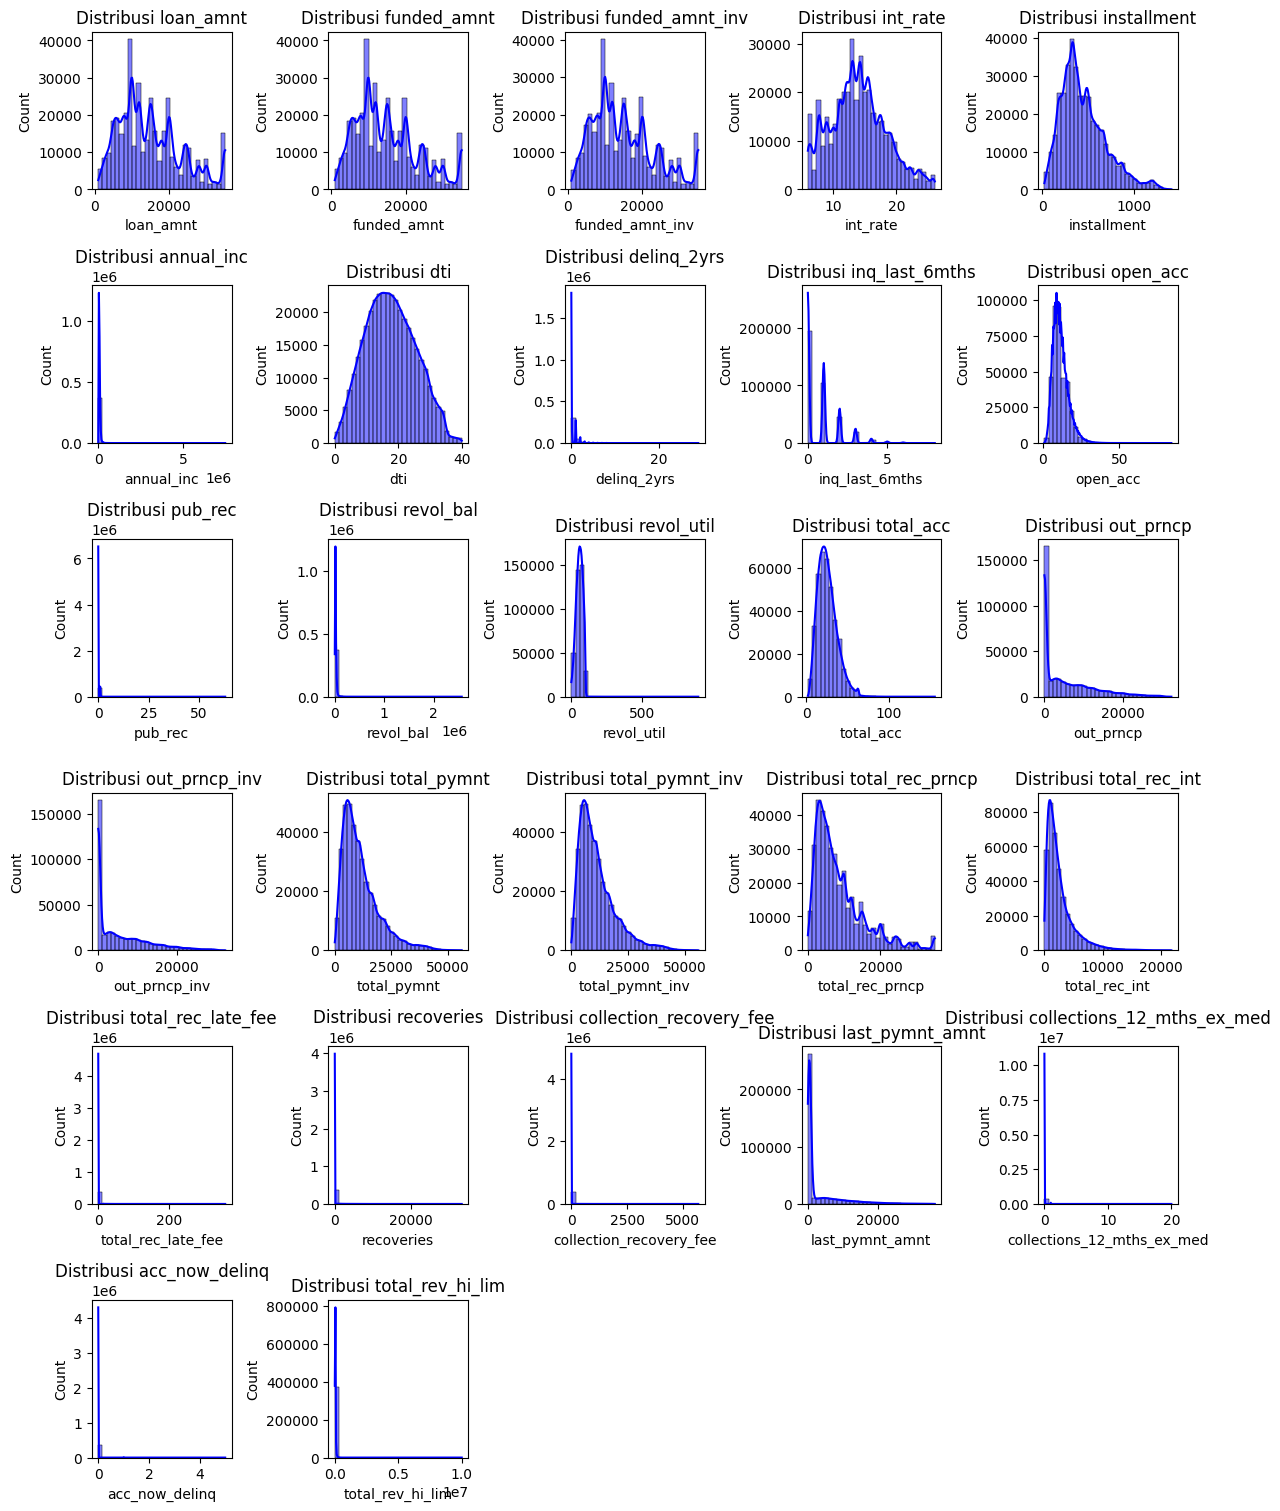

In [93]:
# @title Distribusi variabel numerik menggunakan histogram

plt.figure(figsize=(12, 30))
for i, column in enumerate(data_kontinu2.columns, 1):
    plt.subplot(12, 5, i)
    sns.histplot(data_kontinu2[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

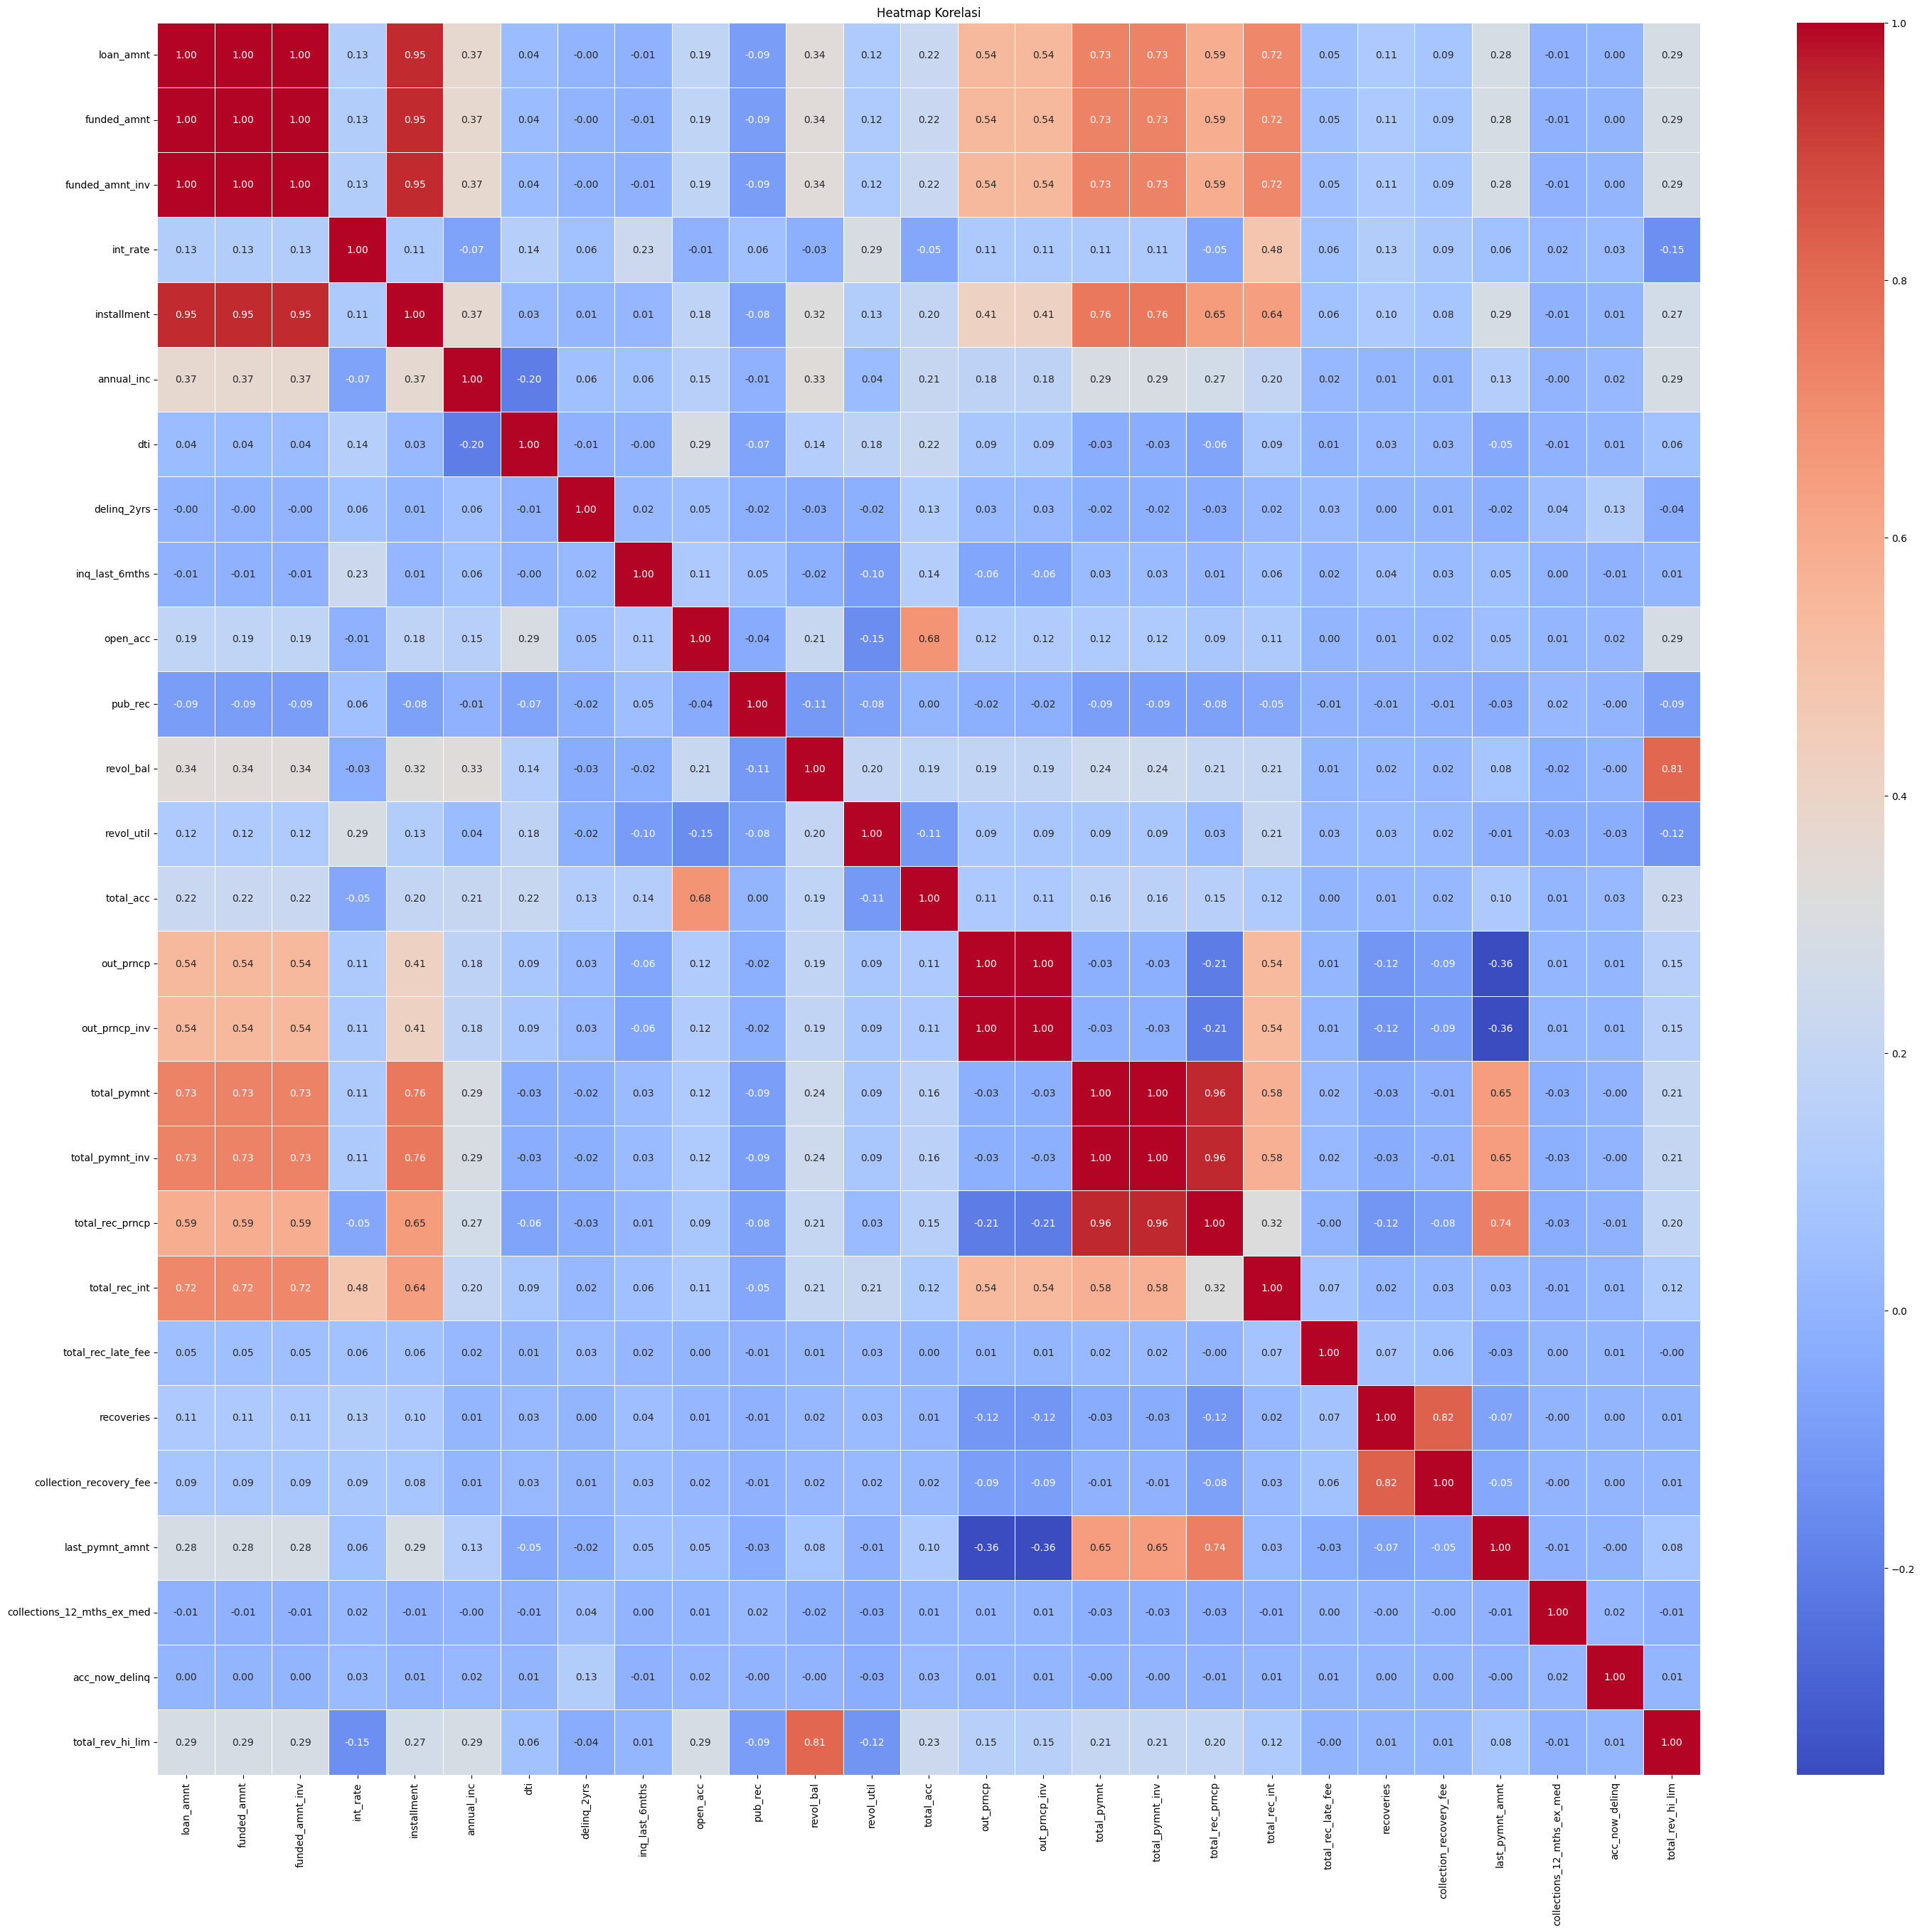

In [94]:
# @title Heatmap korelasi untuk fitur numerik

plt.figure(figsize=(35, 32))
correlation_matrix = data_kontinu2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

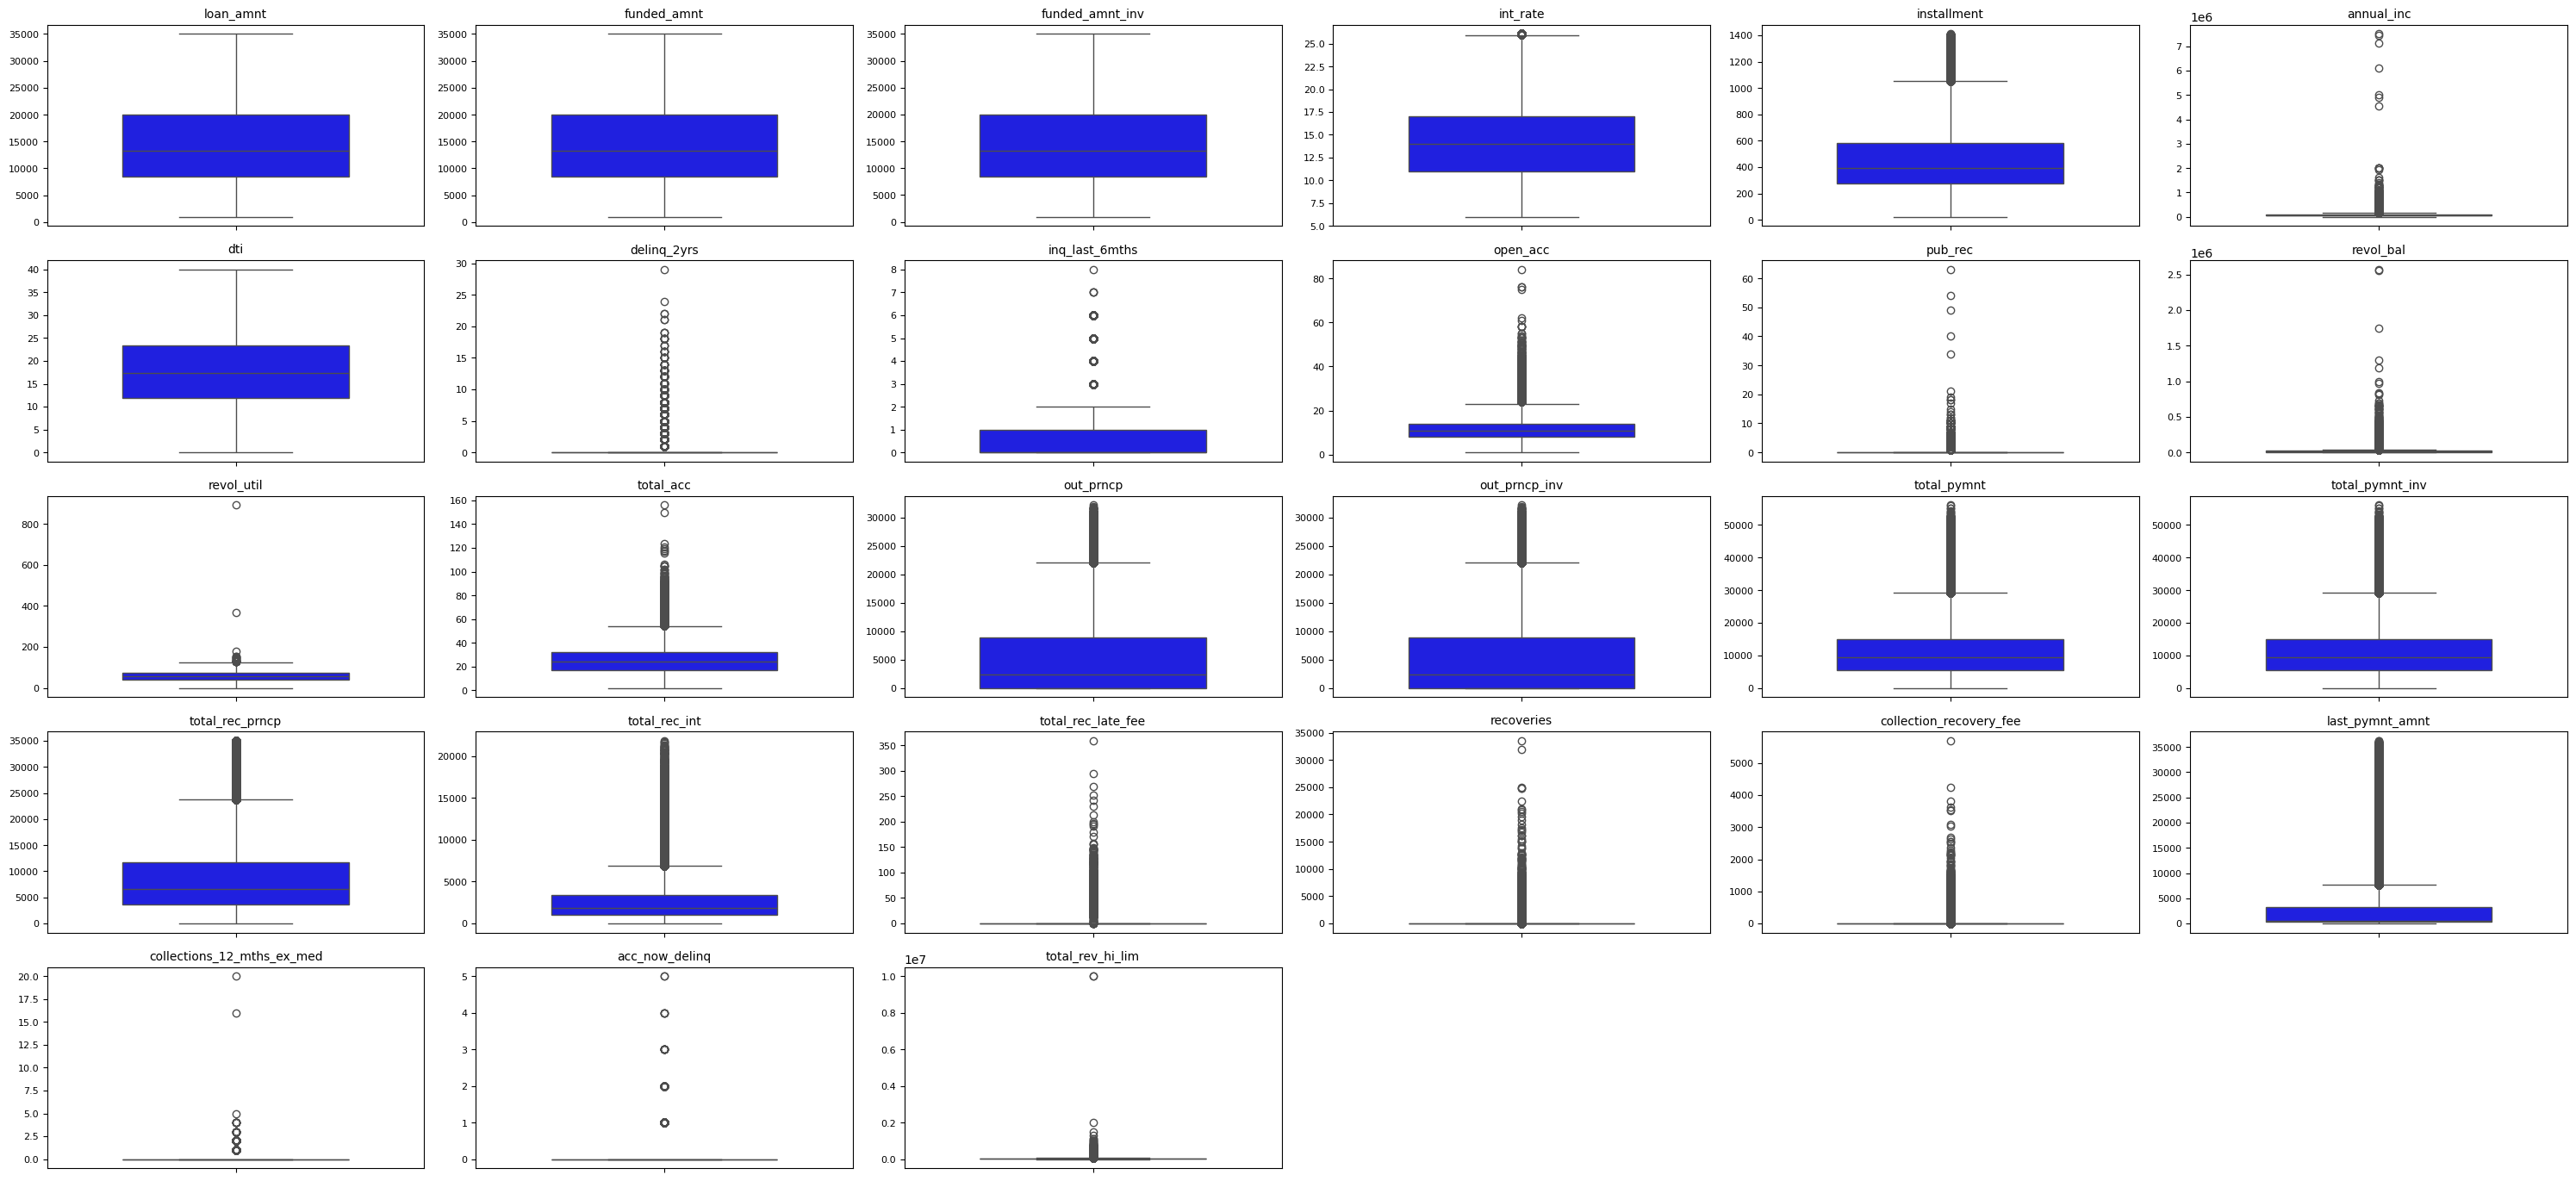

In [95]:
# @title Visualisasi boxplot untuk mengetahui outliers

baris = 10
kolom = 6

plt.figure(figsize=(30, 28))

for i, column in enumerate(data_kontinu2):
    ax = plt.subplot(baris, kolom, i + 1) # i + 1 karena subplot dimulai dari 1

    # Buat Boxplot
    sns.boxplot(y=data_kontinu2[column], ax=ax, color='blue', width=0.6) # Menggunakan y= untuk boxplot vertikal

    # Tambahkan judul untuk setiap subplot
    ax.set_title(f'{column}', fontsize=10)
    ax.set_ylabel('') # Hapus label y default (seringkali tidak perlu untuk boxplot)
    ax.set_xlabel('') # Hapus label x default
    ax.tick_params(axis='y', labelsize=8) # Ukuran tick label sumbu y

# --- 5. Penyesuaian Layout dan Tampilan Akhir ---
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Sesuaikan layout untuk memberi ruang pada suptitle
plt.show()

/tmp/ipython-input-1248318079.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_barchart[column], palette='viridis', order=data_barchart[column].value_counts().index[:4])
/tmp/ipython-input-1248318079.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_barchart[column], palette='viridis', order=data_barchart[column].value_counts().index[:4])
/tmp/ipython-input-1248318079.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_barchart[column], palette='viridis', order=data_barchart[column].value_counts().index[:4])
/

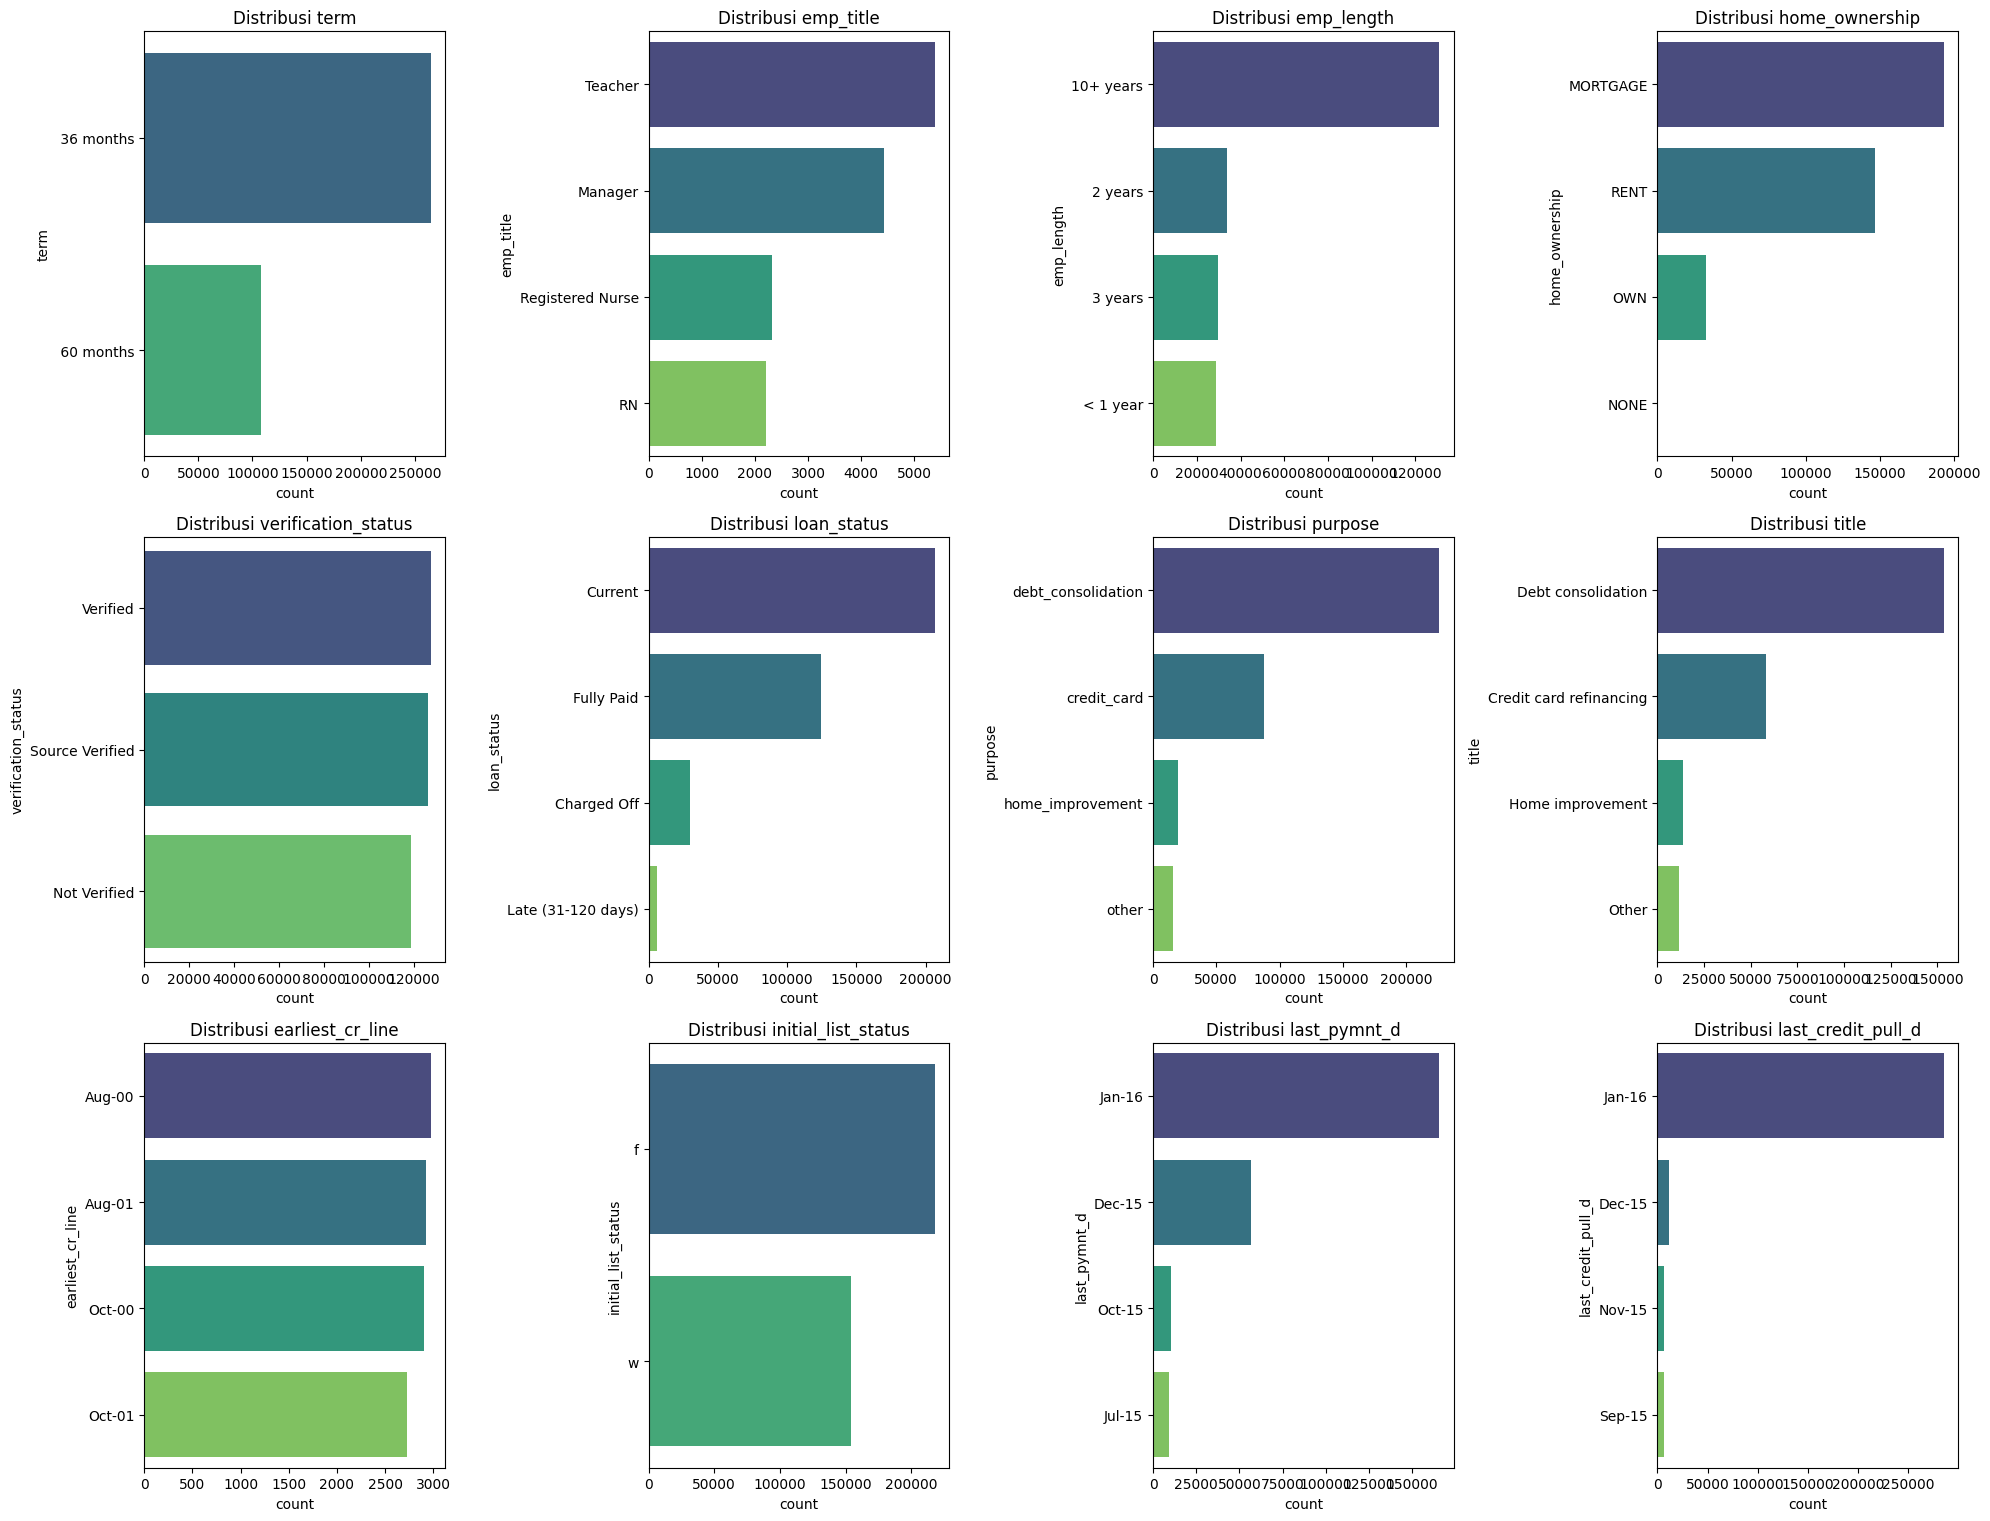

In [96]:
# @title Distribusi variabel kategori menggunakan barchart

data_barchart = data_kategorik2.drop(columns=['grade'])

plt.figure(figsize=(20, 25))
for i, column in enumerate(data_barchart, 1):
    plt.subplot(5, 4, i)
    sns.countplot(y=data_barchart[column], palette='viridis', order=data_barchart[column].value_counts().index[:4])
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2660600633.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='grade', data=data2, palette='viridis')


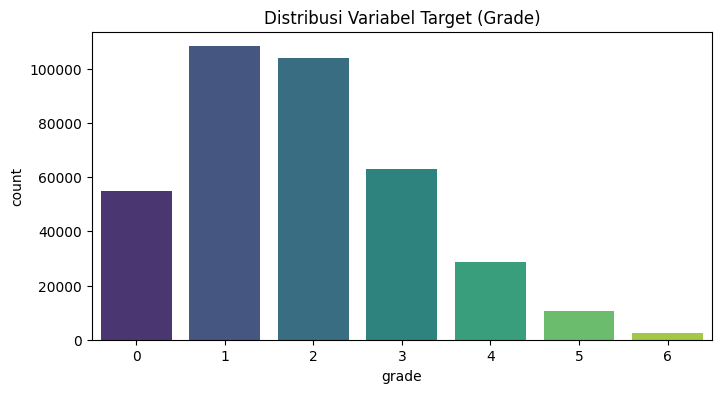


jumlah data dari setiap grade
grade
1    108254
2    104013
3     62976
0     54954
4     28848
5     10607
6      2509
Name: count, dtype: int64


In [92]:
# @title visualisasi variabel target (grade) menggunakan barchart

data_target = data2['grade']

plt.figure(figsize=(8, 4))
sns.countplot(x='grade', data=data2, palette='viridis')
plt.title('Distribusi Variabel Target (Grade)')
plt.show()

#menampilkan jumlah dari setiap kategori
print("\njumlah data dari setiap grade")
print(data_target.value_counts())

# **Data Modelling**

In [55]:
# Daftar model
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Loop evaluasi model
for name, model in models.items():
    print(f"\n=== {name} ===")

    # Gunakan data yang distandarisasi untuk model tertentu
    if name in ["Logistic Regression", "K-Nearest Neighbors", "Support Vector Machine"]:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train
        X_test_use = X_test

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_use, y_train, cv=5)
    print(f"Cross-Validation Accuracy (Train): {np.mean(cv_scores):.2f} (+/- {np.std(cv_scores):.2f})")

    # Fit model dan prediksi test set
    model.fit(X_train_use, y_train)
    y_pred = model.predict(X_test_use)

    # Evaluasi pada test set
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"Test Set Accuracy : {acc:.2f}")
    print(f"Precision (macro) : {prec:.2f}")
    print(f"Recall (macro)    : {rec:.2f}")
    print(f"F1 Score (macro)  : {f1:.2f}")


=== Logistic Regression ===
Cross-Validation Accuracy (Train): 0.90 (+/- 0.00)
Test Set Accuracy : 0.90
Precision (macro) : 0.88
Recall (macro)    : 0.88
F1 Score (macro)  : 0.88

=== K-Nearest Neighbors ===
Cross-Validation Accuracy (Train): 0.54 (+/- 0.00)
Test Set Accuracy : 0.55
Precision (macro) : 0.50
Recall (macro)    : 0.40
F1 Score (macro)  : 0.42

=== Decision Tree ===
Cross-Validation Accuracy (Train): 0.98 (+/- 0.00)
Test Set Accuracy : 0.98
Precision (macro) : 0.99
Recall (macro)    : 0.99
F1 Score (macro)  : 0.99

=== Random Forest ===
Cross-Validation Accuracy (Train): 0.96 (+/- 0.00)
Test Set Accuracy : 0.96
Precision (macro) : 0.96
Recall (macro)    : 0.93
F1 Score (macro)  : 0.95


# **Evaluation**

In [76]:
# Data hasil evaluasi
metriks_eval = [
    {
        "Model": "Logistic Regression",
        "train Accuracy": 0.90,
        "Test Accuracy": 0.90,
        "Precision": 0.88,
        "Recall": 0.88,
        "F1 Score": 0.88
    },
    {
        "Model": "K-Nearest Neighbors",
        "train Accuracy": 0.54,
        "Test Accuracy": 0.55,
        "Precision": 0.50,
        "Recall": 0.40,
        "F1 Score": 0.42
    },
    {
        "Model": "Decision Tree",
        "train Accuracy": 0.98,
        "Test Accuracy": 0.98,
        "Precision": 0.99,
        "Recall": 0.99,
        "F1 Score": 0.99
    },
    {
        "Model": "Random Forest",
        "train Accuracy": 0.96,
        "Test Accuracy": 0.96,
        "Precision": 0.96,
        "Recall": 0.93,
        "F1 Score": 0.95
    }
]

# Buat DataFrame
tabel = pd.DataFrame(metriks_eval)

# Cetak rapi menggunakan tabulate
print(tabulate(tabel, headers='keys', tablefmt='fancy_grid', showindex=False))


╒═════════════════════╤══════════════════╤═════════════════╤═════════════╤══════════╤════════════╕
│ Model               │   train Accuracy │   Test Accuracy │   Precision │   Recall │   F1 Score │
╞═════════════════════╪══════════════════╪═════════════════╪═════════════╪══════════╪════════════╡
│ Logistic Regression │             0.9  │            0.9  │        0.88 │     0.88 │       0.88 │
├─────────────────────┼──────────────────┼─────────────────┼─────────────┼──────────┼────────────┤
│ K-Nearest Neighbors │             0.54 │            0.55 │        0.5  │     0.4  │       0.42 │
├─────────────────────┼──────────────────┼─────────────────┼─────────────┼──────────┼────────────┤
│ Decision Tree       │             0.98 │            0.98 │        0.99 │     0.99 │       0.99 │
├─────────────────────┼──────────────────┼─────────────────┼─────────────┼──────────┼────────────┤
│ Random Forest       │             0.96 │            0.96 │        0.96 │     0.93 │       0.95 │
╘═════════

## Berdasarkan tabel diatas keempat model tidak ada yang mengalami underfitting maupun overfitting. Model terbaik yaitu kepada algoritma **decision tree** dengan akurasi (training dan testing), presisi, recall, F1 score paling tinggi diantara model yang lain.